**Analysing the flight data**

We will be looking at the data, to see which features have more impact on price than others.

In [2]:
# importing the libraries
import pandas as pd # for reading csv
import matplotlib.pyplot as plt #for plotting graphs

Read file and view top 5 rows

In [3]:
df=pd.read_csv('Clean_Dataset.csv')
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


Delete unneccessary column 'Unnamed: 0' (used for serial numbers)

In [7]:
# Dropping column 'Unnamed: 0'
df=df.drop('Unnamed: 0',axis=1)
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


Let's look at the size of the data

In [8]:
# Shape of the data 
df.shape
#how many rows and columns

(300153, 11)

Data has 300153 examples (samples), 11 features in each (last feature is the target)

Let's get some statistics about numerical data (only features with numeric values)

In [9]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


We have three numerical features namely duration, days_left, and price (the target feature)

Draw a correlation between numerical features (i.e. days_left, price, and duration) to see the relation.

In [10]:
df.corr().T #corelation between numerical data

,duration,days_left,price
duration,1.000000,-0.039157,0.204222
days_left,-0.039157,1.000000,-0.091949
price,0.204222,-0.091949,1.000000


So, when there is an increase in days_left there is a decrease in price, and with a decrease in duration there is an increase in price.

Now let's see a histogram of the price.

<AxesSubplot:xlabel='price', ylabel='Count'>

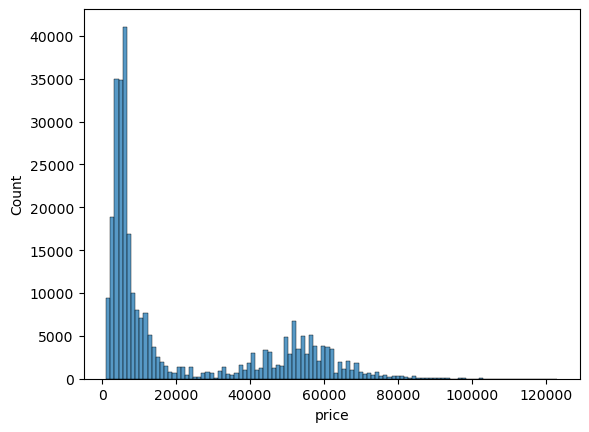

In [9]:
import seaborn as sns # to draw histogram
plt.figure()
sns.histplot(x = 'price', data = df)

We can see that the mean is around 20000 but the median is around 7500. (more ticket of 7500 are sold than others)

<AxesSubplot:xlabel='duration', ylabel='Count'>

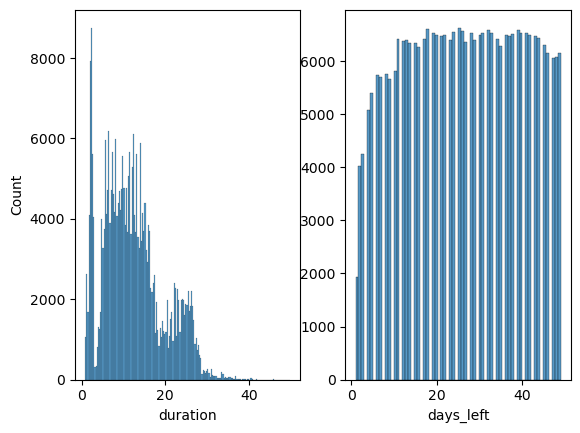

In [8]:
plt.figure()
plt.subplot(1,2,2)
sns.histplot(x = 'days_left', data = df) #evenly distributed histogram
plt.subplot(1,2,1)
sns.histplot(x = 'duration', data = df) # short duration flights are more frequent

The frequency of short duration flights are higher than long flights

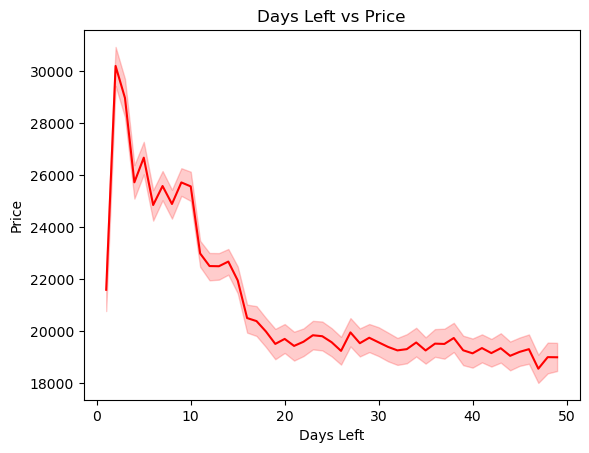

In [12]:
plt.figure()
sns.lineplot(data=df,x='days_left',y='price',color='red')
plt.title('Days Left vs Price')
plt.xlabel('Days Left')
plt.ylabel('Price')
plt.show()

Price increases with each passing day, the max price is when there are 2 to 3 days left. 

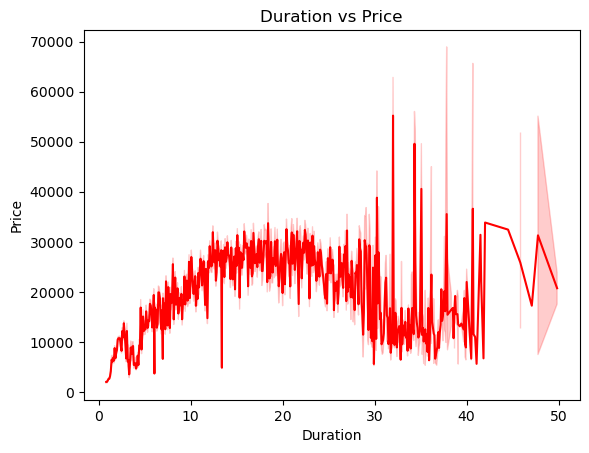

In [16]:
plt.figure()
sns.lineplot(data=df,x='duration',y='price',color='red')
plt.title('Duration vs Price')
plt.xlabel('Duration')
plt.ylabel('Price')
plt.show()